Set folder_path to: ultrasound_data copy
Listed contents of folder_path: ['benign', 'malignant', 'normal']


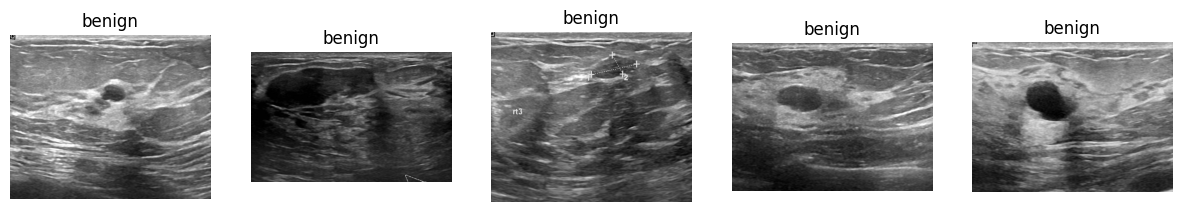

Displayed 5 images from class: benign
Found 4886 validated image filenames belonging to 1 classes.
Class: benign
Number of images before augmentation: 437
Number of images after augmentation: 4896


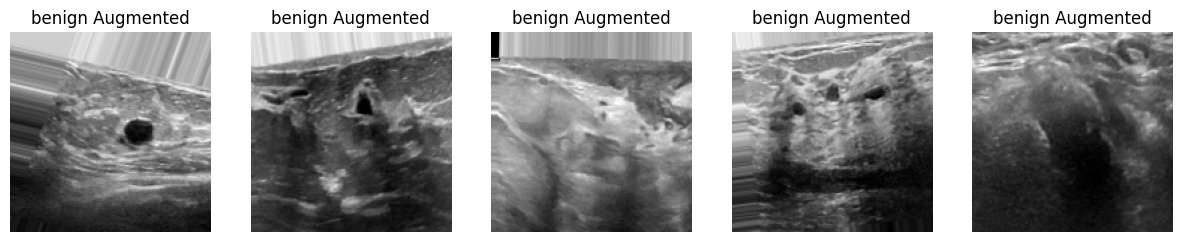

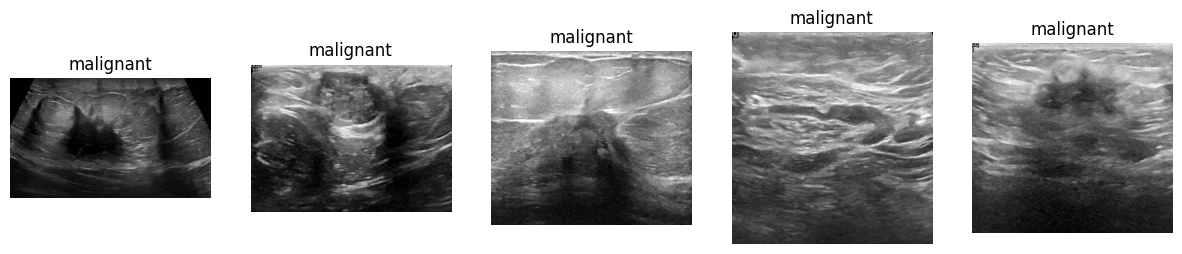

Displayed 5 images from class: malignant
Found 4872 validated image filenames belonging to 1 classes.
Class: malignant
Number of images before augmentation: 210
Number of images after augmentation: 4896


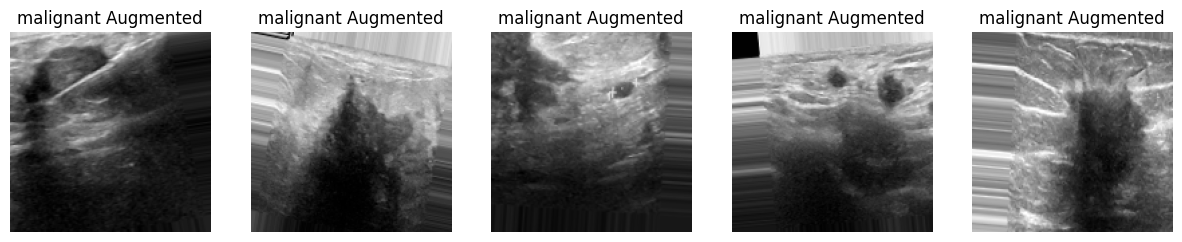

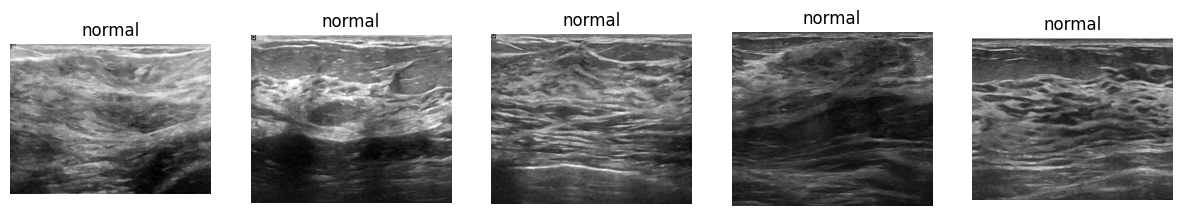

Displayed 5 images from class: normal
Found 4982 validated image filenames belonging to 1 classes.
Class: normal
Number of images before augmentation: 133
Number of images after augmentation: 4992


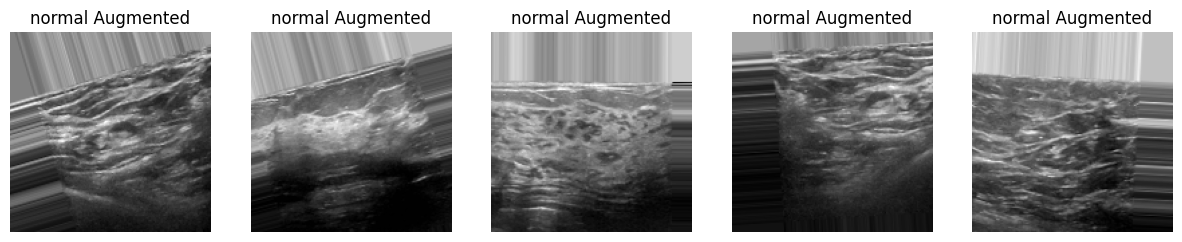

In [5]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd

# Function to display images from each class
def display_images_from_class(folder_path, class_name, num_images=5):
    class_folder = os.path.join(folder_path, class_name)
    images = os.listdir(class_folder)
    selected_images = random.sample(images, num_images)
    
    plt.figure(figsize=(15, 3))
    for i, image_name in enumerate(selected_images):
        image_path = os.path.join(class_folder, image_name)
        img = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')  # Assuming images are black and white
        plt.title(class_name)
        plt.axis('off')
    plt.show()
    print(f"Displayed {num_images} images from class: {class_name}")

# Display 5 images from each class before and after augmentation
folder_path = r'ultrasound_data copy'
print(f"Set folder_path to: {folder_path}")

classes = os.listdir(folder_path)
print(f"Listed contents of folder_path: {classes}")

desired_images_per_class = 5000

for class_name in classes:
    class_folder = os.path.join(folder_path, class_name)
    class_images = [os.path.join(class_folder, img) for img in os.listdir(class_folder)]

    num_images_before = len(class_images)

    display_images_from_class(folder_path, class_name)

    # Split dataset into train and test sets (80-20 split)
    train_images, test_images, train_labels,test_labels = train_test_split(class_images, [class_name] * len(class_images), test_size=0.2, random_state=42)

    num_images = len(train_images)
    augmentation_factor = max(1, int(desired_images_per_class / num_images))

    # Augment the training dataset using ImageDataGenerator for black and white images
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rescale=1.0 / 255  # Rescale for black and white images
    )

    # Create a DataFrame to use with ImageDataGenerator
    train_df = pd.DataFrame({
        'image_paths': train_images * augmentation_factor,
        'labels': train_labels * augmentation_factor
    })

    # Generate augmented images using flow_from_dataframe() method
    img_height, img_width = 150, 150
    batch_size = 32

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='image_paths',
        y_col='labels',
        target_size=(img_height, img_width),
        color_mode='grayscale',  # Set to grayscale for black and white images
        batch_size=batch_size,
        class_mode='categorical'
    )

    num_augmented_images = len(train_generator) * batch_size

    print(f"Class: {class_name}")
    print(f"Number of images before augmentation: {num_images_before}")
    print(f"Number of images after augmentation: {num_augmented_images}")

    # Get augmented images batch
    augmented_images, _ = train_generator.next()

    # Display 5 augmented images
    plt.figure(figsize=(15, 3))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(augmented_images[i].reshape((img_height, img_width)), cmap='gray')
        plt.title(f"{class_name} Augmented")
        plt.axis('off')
    plt.show()


In [31]:
# import os
# import random
# from PIL import Image
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# import pandas as pd
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import (
#     VGG16, VGG19, ResNet50, ResNet101, MobileNetV2, DenseNet121,
#     InceptionV3, InceptionResNetV2, Xception, EfficientNetB0
# )
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Function to display images from each class
# def display_images_from_class(folder_path, class_name, num_images=5):
#     class_folder = os.path.join(folder_path, class_name)
#     images = os.listdir(class_folder)
#     selected_images = random.sample(images, num_images)
    
#     plt.figure(figsize=(15, 3))
#     for i, image_name in enumerate(selected_images):
#         image_path = os.path.join(class_folder, image_name)
#         img = Image.open(image_path)
#         plt.subplot(1, num_images, i + 1)
#         plt.imshow(img, cmap='gray')  # Assuming images are black and white
#         plt.title(class_name)
#         plt.axis('off')
#     plt.show()
#     print(f"Displayed {num_images} images from class: {class_name}")

# # Display 5 images from each class before and after augmentation
# folder_path = r'ultrasound_data copy'  # Update with your dataset path
# print(f"Set folder_path to: {folder_path}")

# classes = os.listdir(folder_path)
# print(f"Listed contents of folder_path: {classes}")

# desired_images_per_class = 5000

# accuracies = {}  # Dictionary to store accuracies for each model

# for class_name in classes:
#     class_folder = os.path.join(folder_path, class_name)
#     class_images = [os.path.join(class_folder, img) for img in os.listdir(class_folder)]

#     num_images_before = len(class_images)

#     display_images_from_class(folder_path, class_name)

#     # Split dataset into train and test sets (80-20 split)
#     train_images, test_images, train_labels, test_labels = train_test_split(
#         class_images, [class_name] * len(class_images), test_size=0.2, random_state=42
#     )

#     num_images = len(train_images)
#     augmentation_factor = max(1, int(desired_images_per_class / num_images))

#     # Augment the training dataset using ImageDataGenerator for black and white images
#     train_datagen = ImageDataGenerator(
#         rotation_range=20,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest',
#         rescale=1.0 / 255  # Rescale for black and white images
#     )

#     # Create a DataFrame to use with ImageDataGenerator
#     train_df = pd.DataFrame({
#         'image_paths': train_images * augmentation_factor,
#         'labels': train_labels * augmentation_factor
#     })

#     # Generate augmented images using flow_from_dataframe() method
#     img_height, img_width = 150, 150
#     batch_size = 32

#     train_generator = train_datagen.flow_from_dataframe(
#         dataframe=train_df,
#         x_col='image_paths',
#         y_col='labels',
#         target_size=(img_height, img_width),
#         color_mode='rgb',  # Set to grayscale for black and white images
#         batch_size=batch_size,
#         class_mode='categorical'
#     )

#     num_augmented_images = len(train_generator) * batch_size

#     print(f"Class: {class_name}")
#     print(f"Number of images before augmentation: {num_images_before}")
#     print(f"Number of images after augmentation: {num_augmented_images}")

#     # Load different pre-trained models
#     pretrained_models = [
#         VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#         VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#         ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#         ResNet101(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#         MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#         DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#         InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#         InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#         Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#         EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)),
#     ]

#     for model in pretrained_models:
#         x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
#         x = tf.keras.layers.Dense(512, activation='relu')(x)
#         x = tf.keras.layers.Dropout(0.5)(x)
#         output = tf.keras.layers.Dense(len(classes), activation='softmax')(x)

#         new_model = tf.keras.models.Model(inputs=model.input, outputs=output)

#         for layer in model.layers:
#             layer.trainable = False

#         new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#         # Train the model
#         history = new_model.fit(train_generator, epochs=10, verbose=0)

#         # Evaluate on test data
#         test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # No augmentation for test set
#         test_df = pd.DataFrame({
#             'image_paths': test_images,
#             'labels': test_labels
#         })
#         test_generator = test_datagen.flow_from_dataframe(
#             dataframe=test_df,
#             x_col='image_paths',
#             y_col='labels',
#             target_size=(img_height, img_width),
#             color_mode='grayscale',
#             batch_size=batch_size,
#             class_mode='categorical',
#             shuffle=False
#         )
#         _, accuracy = new_model.evaluate(test_generator)
#         model_name = model.name
#         accuracies[model_name] = accuracy

# # Print the accuracies
# for model_name, accuracy in accuracies.items():
#     print(f"{model_name}: Test Accuracy - {accuracy}")

# # Identify the best-performing model
# best_model_name = max(accuracies, key=accuracies.get)
# print(f"\nBest performing model: {best_model_name} with Test Accuracy: {accuracies[best_model_name]}")


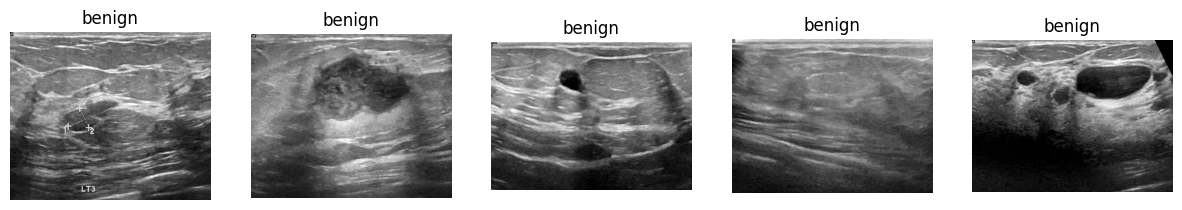

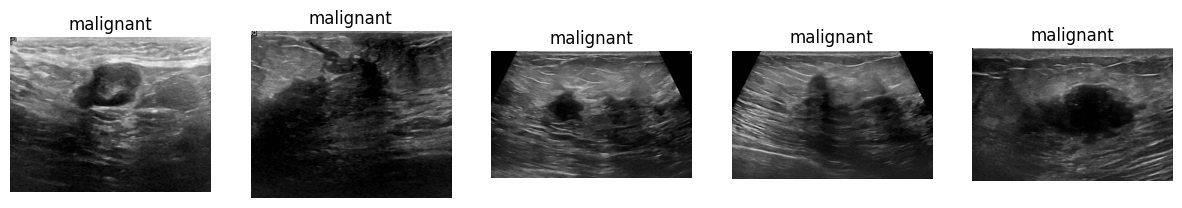

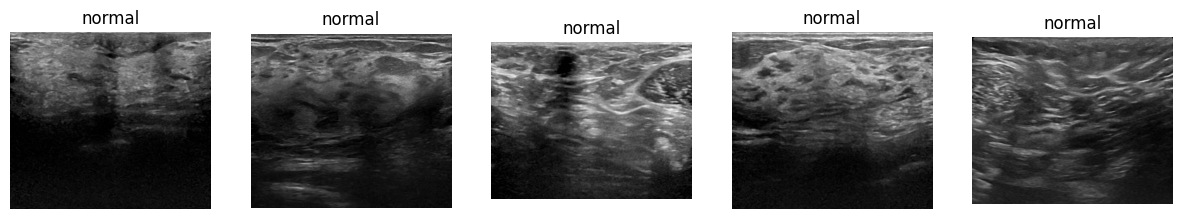

Found 638 validated image filenames belonging to 3 classes.
Found 160 validated image filenames belonging to 3 classes.
Epoch 1/10
20/20 [==============================] - 44s 2s/step - loss: 8.3335 - accuracy: 0.4451 - val_loss: 1.9035 - val_accuracy: 0.6375
Epoch 2/10
20/20 [==============================] - 45s 2s/step - loss: 5.4666 - accuracy: 0.5266 - val_loss: 1.9708 - val_accuracy: 0.6687
Epoch 3/10
20/20 [==============================] - 48s 2s/step - loss: 3.9524 - accuracy: 0.5470 - val_loss: 1.7697 - val_accuracy: 0.6750
Epoch 4/10
20/20 [==============================] - 46s 2s/step - loss: 3.2500 - accuracy: 0.6332 - val_loss: 1.8894 - val_accuracy: 0.6562
Epoch 5/10
20/20 [==============================] - 47s 2s/step - loss: 2.8340 - accuracy: 0.5909 - val_loss: 1.7933 - val_accuracy: 0.6562
Epoch 6/10
20/20 [==============================] - 48s 2s/step - loss: 1.9964 - accuracy: 0.6505 - val_loss: 1.0283 - val_accuracy: 0.7563
Epoch 7/10
20/20 [======================

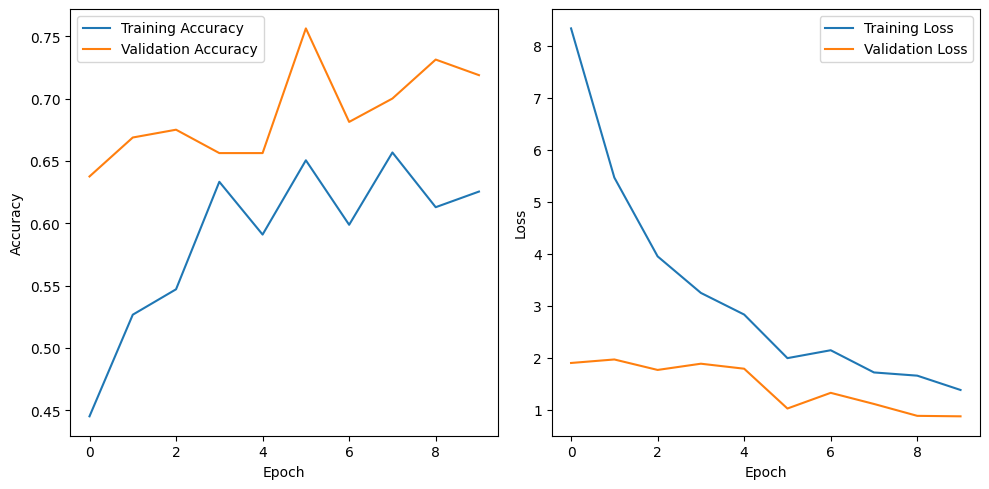

5/5 [==============================] - 11s 2s/step - loss: 0.8782 - accuracy: 0.7188
Test Accuracy: 71.88%


In [34]:
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Function to display images from each class
def display_images_from_class(folder_path, class_name, num_images=5):
    class_folder = os.path.join(folder_path, class_name)
    images = os.listdir(class_folder)
    selected_images = random.sample(images, num_images)
    
    plt.figure(figsize=(15, 3))
    for i, image_name in enumerate(selected_images):
        image_path = os.path.join(class_folder, image_name)
        img = Image.open(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Display 5 images from each class
folder_path = 'ultrasound_data copy'
classes = os.listdir(folder_path)
for class_name in classes:
    display_images_from_class(folder_path, class_name)

# Create lists for images and labels
images = []
labels = []
for class_name in classes:
    class_folder = os.path.join(folder_path, class_name)
    class_images = [os.path.join(class_folder, img) for img in os.listdir(class_folder)]
    images.extend(class_images)
    labels.extend([class_name] * len(class_images))

# Split dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create dataframes from lists of train and test images and labels
train_df = pd.DataFrame({'filename': train_images, 'class': train_labels})
test_df = pd.DataFrame({'filename': test_images, 'class': test_labels})

# Augment the training dataset using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the pre-trained VGG16 model (without the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create data generators using flow_from_dataframe
batch_size = 32
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='sparse'
)

test_datagen = ImageDataGenerator()  # No augmentation for test data
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='sparse'
)

# Train the model
epochs = 10
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=test_generator)

# Plot training history (accuracy and loss)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on test data
_, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [2]:
# import os

# base_directory = r"ultrasound_data copy 2"  # Replace this with your base directory

# for root, dirs, files in os.walk(base_directory):
#     for file in files:
#         if "mask" in file:
#             file_path = os.path.join(root, file)
#             os.remove(file_path)
#             print(f"Removed: {file_path}")

Removed: ultrasound_data copy 2\benign\benign (1)_mask.png
Removed: ultrasound_data copy 2\benign\benign (10)_mask.png
Removed: ultrasound_data copy 2\benign\benign (100)_mask.png
Removed: ultrasound_data copy 2\benign\benign (100)_mask_1.png
Removed: ultrasound_data copy 2\benign\benign (101)_mask.png
Removed: ultrasound_data copy 2\benign\benign (102)_mask.png
Removed: ultrasound_data copy 2\benign\benign (103)_mask.png
Removed: ultrasound_data copy 2\benign\benign (104)_mask.png
Removed: ultrasound_data copy 2\benign\benign (105)_mask.png
Removed: ultrasound_data copy 2\benign\benign (106)_mask.png
Removed: ultrasound_data copy 2\benign\benign (107)_mask.png
Removed: ultrasound_data copy 2\benign\benign (108)_mask.png
Removed: ultrasound_data copy 2\benign\benign (109)_mask.png
Removed: ultrasound_data copy 2\benign\benign (11)_mask.png
Removed: ultrasound_data copy 2\benign\benign (110)_mask.png
Removed: ultrasound_data copy 2\benign\benign (111)_mask.png
Removed: ultrasound_data c